In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
%matplotlib inline

In [3]:
os.chdir('C:\\Users\\Acer\\Documents\\Datasets')
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,...,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,...,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,...,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,...,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,...,no,no,yes,yes,no,4,3,5,0,37


In [5]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
S/N           325 non-null int64
Gender        325 non-null object
Age           325 non-null int64
Location      325 non-null object
famsize       325 non-null object
Pstatus       325 non-null object
Medu          325 non-null int64
Fedu          325 non-null int64
traveltime    325 non-null int64
studytime     325 non-null int64
failures      325 non-null int64
schoolsup     325 non-null object
famsup        325 non-null object
paid          325 non-null object
activities    325 non-null object
nursery       325 non-null object
higher        325 non-null object
internet      325 non-null object
famrel        325 non-null int64
freetime      325 non-null int64
health        325 non-null int64
absences      325 non-null int64
Score         325 non-null int64
dtypes: int64(12), object(11)
memory usage: 58.5+ KB


In [6]:
train.columns

Index(['S/N', 'Gender', 'Age', 'Location', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel',
       'freetime', 'health', 'absences', 'Score'],
      dtype='object')

In [6]:
for column in train.columns:
    print(column+': ', train[column].unique(), '\n')

S/N:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()

In [9]:
d = ['Gender', 'Location', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']
processTrain = train
for i in d:
    processTrain[i] = encoder.fit_transform(processTrain[i])

In [10]:
processTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 23 columns):
S/N           325 non-null int64
Gender        325 non-null int64
Age           325 non-null int64
Location      325 non-null int64
famsize       325 non-null int64
Pstatus       325 non-null int64
Medu          325 non-null int64
Fedu          325 non-null int64
traveltime    325 non-null int64
studytime     325 non-null int64
failures      325 non-null int64
schoolsup     325 non-null int64
famsup        325 non-null int64
paid          325 non-null int64
activities    325 non-null int64
nursery       325 non-null int64
higher        325 non-null int64
internet      325 non-null int64
famrel        325 non-null int64
freetime      325 non-null int64
health        325 non-null int64
absences      325 non-null int64
Score         325 non-null int64
dtypes: int64(23)
memory usage: 58.5 KB


In [11]:
df = processTrain.drop(['S/N'], axis=1)

Text(0.5,1,'Correlation')

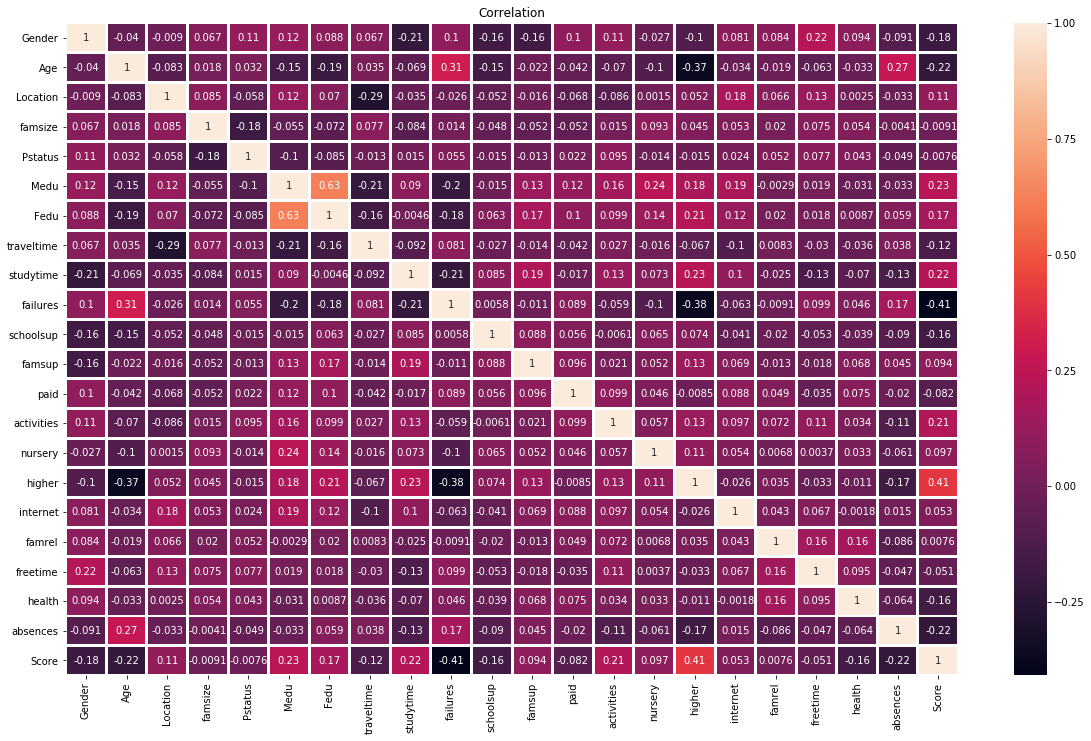

In [12]:
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)
ax.set_title("Correlation")


In [13]:
x = processTrain.drop(['Score'], axis=1)
y = processTrain['Score']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred = lr.predict(x_test)

In [18]:
y_pred

array([38.45046526, 37.48761383, 35.60245783, 38.16696592, 42.15658744,
       33.11701266, 34.81163569, 39.1391811 , 33.75803343, 39.15506663,
       39.09391833, 27.53223083, 32.56042637, 40.72490137, 32.63434985,
       41.28973397, 29.98563126, 38.55416381, 34.61453402, 37.16497501,
       38.16208261, 23.15818563, 37.73271996, 34.09028966, 39.96651918,
       37.17705812, 35.76308953, 31.01677831, 35.8614038 , 37.97285629,
       32.56910299, 36.36574001, 38.9907359 , 29.26500493, 36.41156981,
       25.41735112, 39.97397084, 39.45788196, 23.94027548, 33.39469735,
       39.64727901, 38.43859971, 35.4265906 , 29.14563885, 34.84853693,
       41.39227144, 39.61026985, 30.37343836, 36.54044616, 40.44534729,
       39.38201427, 38.88211726, 34.05983905, 39.86702035, 19.82876726,
       42.1926835 , 35.34841369, 36.2573362 , 40.29796456, 35.92402755,
       25.23165332, 37.1852209 , 38.6642749 , 37.20030476, 40.93526912])

In [19]:
y_test

234    32
110    41
248    27
9      37
93     41
219    25
287    29
198    45
203    28
101    48
181    52
255    22
317    36
139    42
320    39
153    39
146    30
144    34
25     33
5      37
82     34
179    23
46     38
280    29
94     35
309    36
114    29
118    34
63     40
271    34
       ..
175    21
55     37
33     37
163    20
167    39
240    52
42     44
119    41
173    27
45     32
304    36
84     37
310    27
57     46
16     40
77     39
90     31
7      36
76     34
78     28
289    46
285    39
176    27
3      42
73     40
322    27
232    38
60     49
124    34
221    44
Name: Score, Length: 65, dtype: int64

In [20]:
from sklearn.metrics import r2_score

In [21]:
print('r2_score accuracy for the model using linear regession is : {0}'.format(r2_score(y_test, y_pred)))

r2_score accuracy for the model using linear regession is : 0.49259247941554174


In [22]:
from sklearn.linear_model

SyntaxError: invalid syntax (<ipython-input-22-53c5071862d6>, line 1)